In [ ]:
#!pip install tensorflow==2.4
#!pip install tensorflow-gpu==2.4
#!pip install keras==2.3.1
#!pip install h5py==2.10.0

In [1]:
!mkdir dataset
from google.colab import drive
drive.mount('/content/drive/')
!ls

Mounted at /content/drive/
dataset  drive	sample_data


In [2]:
!cp -r -v "/content/drive/MyDrive/AIVIS/Dataset/project.zip" dataset
!unzip "/content/dataset/project.zip" -d /content/dataset

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: /content/dataset/Result/mong/Rot_rand_User.mong.48.jpg  
  inflating: /content/dataset/Result/mong/Rot_rand_User.mong.34.jpg  
  inflating: /content/dataset/Result/mong/Rot_rand_User.mong.88.jpg  
  inflating: /content/dataset/Result/mong/Rot_rand_User.mong.41.jpg  
  inflating: /content/dataset/Result/mong/Rot_rand_User.mong.59.jpg  
  inflating: /content/dataset/Result/mong/Rot_rand_User.mong.80.jpg  
  inflating: /content/dataset/Result/mong/Rot_rand_User.mong.12.jpg  
  inflating: /content/dataset/Result/mong/Rot_rand_User.mong.95.jpg  
  inflating: /content/dataset/Result/mong/Rot_rand_User.mong.18.jpg  
  inflating: /content/dataset/Result/mong/Rot_rand_User.mong.23.jpg  
  inflating: /content/dataset/Result/mong/Rot_rand_User.mong.82.jpg  
  inflating: /content/dataset/Result/mong/Rot_rand_User.mong.30.jpg  
  inflating: /content/dataset/Result/mong/Rot_rand_User.mong.83.jpg  
  inflating: /content/dataset/R

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from sklearn.utils import shuffle
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from keras import layers
import keras


from tensorflow.keras.utils import to_categorical
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from tensorflow.keras.layers import BatchNormalization
import os
from keras.losses import categorical_crossentropy


cls = sorted(os.listdir("/content/dataset/Result"))
print(cls)
num_class = len(cls)
print (num_class)

name_file = "MOBILENETV1-Jan-2024"


# Any results you write to the current directory are saved as output.

['Putro', 'aser', 'ezrah', 'ferel', 'frits', 'ichal', 'jorgi', 'karen', 'mong', 'reki', 'riki']
11


In [4]:
data_path = '/content/dataset/Result'
data_dir_list = sorted(os.listdir(data_path))

i = 0
#tot_class=[1,1,1,1]
tot_class=np.ones((num_class,), dtype=int)
img_data_list=[]


for dataset in data_dir_list:
    img_list=sorted(os.listdir(data_path+'/'+ dataset))
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        #input_img = layers.Lambda(lambda x: tf.expand_dims(x, axis=0))(input_img)  # [bs,1,C,H*W]

        input_img_resize=cv2.resize(input_img,(48,48))
        #input_img_resize = input_img
        input_img_resize = input_img_resize.reshape(48, 48, 1)
        img_data_list.append(input_img_resize)
    tot_class[i] = len(img_data_list)
    print(tot_class[i])
    i = i + 1

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

print (tot_class)
img_list = []
img = []
img_data_list=[]

Loaded the images of dataset-Putro

700
Loaded the images of dataset-aser

1379
Loaded the images of dataset-ezrah

1379
Loaded the images of dataset-ferel

2065
Loaded the images of dataset-frits

2065
Loaded the images of dataset-ichal

2765
Loaded the images of dataset-jorgi

3465
Loaded the images of dataset-karen

4165
Loaded the images of dataset-mong

4865
Loaded the images of dataset-reki

5565
Loaded the images of dataset-riki

6265
[ 700 1379 1379 2065 2065 2765 3465 4165 4865 5565 6265]


In [5]:
num_classes = num_class

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:(tot_class[0])]=0
print ("Class 0", ":", 0,"to", tot_class[0] )
for x in range(num_class-1):
    #print (x)
    x_next = x + 1
    labels[tot_class[x]:(tot_class[x_next])] = x_next
    print ("Class",x_next, ":", tot_class[x],"to", tot_class[x_next] )


names = cls
print(cls)
def getLabel(id):
    return names[id]

Class 0 : 0 to 700
Class 1 : 700 to 1379
Class 2 : 1379 to 1379
Class 3 : 1379 to 2065
Class 4 : 2065 to 2065
Class 5 : 2065 to 2765
Class 6 : 2765 to 3465
Class 7 : 3465 to 4165
Class 8 : 4165 to 4865
Class 9 : 4865 to 5565
Class 10 : 5565 to 6265
['Putro', 'aser', 'ezrah', 'ferel', 'frits', 'ichal', 'jorgi', 'karen', 'mong', 'reki', 'riki']


In [6]:
Y = to_categorical(labels, num_classes)
labels = []

x, y = shuffle(img_data, Y, random_state=2)
img_data = []
Y = []
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
x = []
y = []

print("total Train:", len(y_train))
print("total Valid:", len(y_val))
img_data = []

total Train: 5012
total Valid: 1253


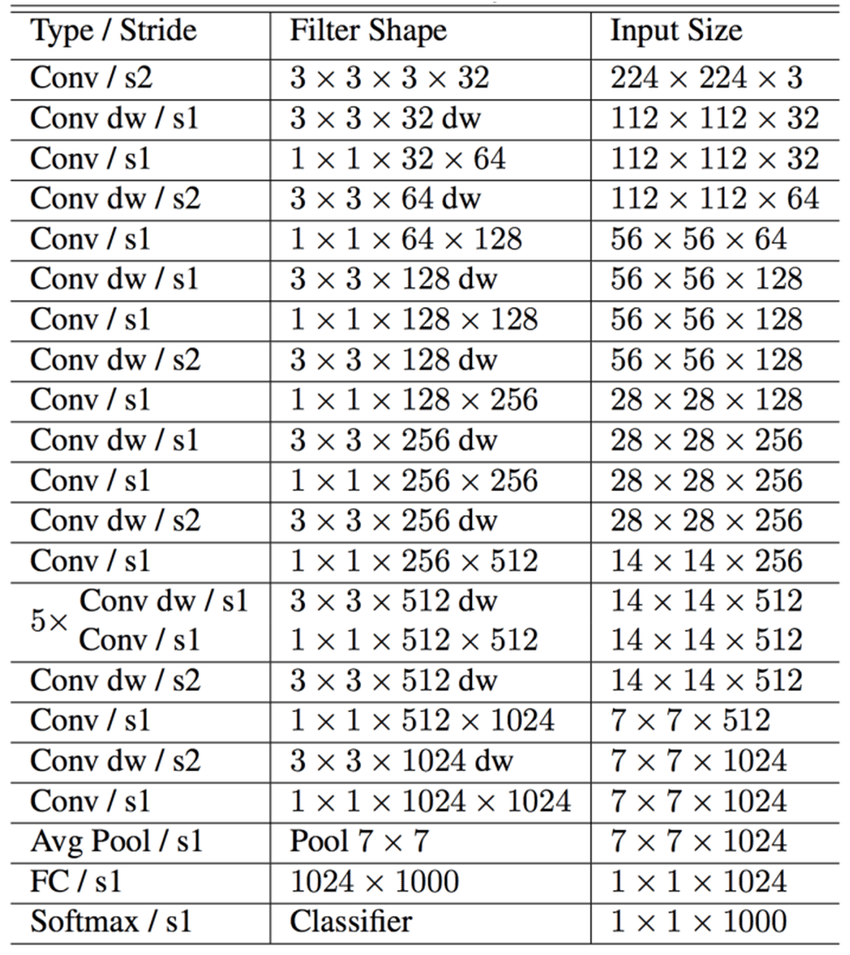

In [11]:
from keras.layers import Activation, Convolution2D, Dropout, Conv2D, Dense, Concatenate, Add, PReLU, LeakyReLU, Multiply
from keras.layers import AveragePooling2D, BatchNormalization, DepthwiseConv2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Flatten
from keras.models import Model
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras import layers
from keras.regularizers import l2
from keras import regularizers
from keras import layers
import numpy as np
import cv2


def mobilenetv1(input_shape, num_classes):
    #model = Sequential()

    img_input = Input(input_shape)
    x = ZeroPadding2D(padding=1)(img_input)
    x = Conv2D(32, (3,3), strides=2)(x)
    x = BatchNormalization ()(x)
    x = Activation('relu')(x)

    #DW1
    x = DepthwiseConv2D((3,3), strides=1, padding='same')(x)
    x = BatchNormalization ()(x)
    x = Activation('relu')(x)
    #PW1
    x = Conv2D(64, (1,1), strides=1, padding='same')(x)
    x = BatchNormalization ()(x)
    x = Activation('relu')(x)

    #DW2
    x = ZeroPadding2D(padding=1)(x)
    x = DepthwiseConv2D((3,3), strides=2)(x)
    x = BatchNormalization ()(x)
    x = Activation('relu')(x)
    #PW2
    x = Conv2D(128, (1,1), strides=1, padding='same')(x)
    x = BatchNormalization ()(x)
    x = Activation('relu')(x)

    #DW3
    x = ZeroPadding2D(padding=1)(x)
    x = DepthwiseConv2D((3,3), strides=1)(x)
    x = BatchNormalization ()(x)
    x = Activation('relu')(x)
    #PW3
    x = Conv2D(128, (1,1), strides=1, padding='same')(x)
    x = BatchNormalization ()(x)
    x = Activation('relu')(x)

    #DW4
    x = ZeroPadding2D(padding=1)(x)
    x = DepthwiseConv2D((3,3), strides=2)(x)
    x = BatchNormalization ()(x)
    x = Activation('relu')(x)
    #PW4
    x = Conv2D(256, (1,1), strides=1, padding='same')(x)
    x = BatchNormalization ()(x)
    x = Activation('relu')(x)

    #DW5
    x = DepthwiseConv2D((3,3), strides=1, padding='same')(x)
    x = BatchNormalization ()(x)
    x = Activation('relu')(x)
    #PW5
    x = Conv2D(256, (1,1), strides=1, padding='same')(x)
    x = BatchNormalization ()(x)
    x = Activation('relu')(x)

    #DW6
    x = ZeroPadding2D(padding=1)(x)
    x = DepthwiseConv2D((3,3), strides=2)(x)
    x = BatchNormalization ()(x)
    x = Activation('relu')(x)
    #PW6
    x = Conv2D(512, (1,1), strides=1, padding='same')(x)
    x = BatchNormalization ()(x)
    x = Activation('relu')(x)

    #DW7_1
    c1 = DepthwiseConv2D((3,3), strides=1, padding='same')(x)
    c1 = BatchNormalization ()(c1)
    c1 = Activation('relu')(c1)
    #PW7_1
    p1 = Conv2D(512, (1,1), strides=1, padding='same')(c1)
    p1 = BatchNormalization ()(p1)
    p1 = Activation('relu')(p1)

    #DW7_2
    c2 = DepthwiseConv2D((3,3), strides=1, padding='same')(p1)
    c2 = BatchNormalization ()(c1)
    c2 = Activation('relu')(c1)
    #PW7_2
    p2 = Conv2D(512, (1,1), strides=1, padding='same')(c2)
    p2 = BatchNormalization ()(p2)
    p2 = Activation('relu')(p2)

    #DW7_3
    c3 = DepthwiseConv2D((3,3), strides=1, padding='same')(p2)
    c3 = BatchNormalization ()(c3)
    c3 = Activation('relu')(c3)
    #PW7_3
    p3 = Conv2D(512, (1,1), strides=1, padding='same')(c3)
    p3 = BatchNormalization ()(p3)
    p3 = Activation('relu')(p3)

    #DW7_4
    c4 = DepthwiseConv2D((3,3), strides=1, padding='same')(p3)
    c4 = BatchNormalization ()(c4)
    c4 = Activation('relu')(c4)
    #PW7_4
    p4 = Conv2D(512, (1,1), strides=1, padding='same')(c4)
    p4 = BatchNormalization ()(p4)
    p4 = Activation('relu')(p4)

    #DW7_5
    c5 = DepthwiseConv2D((3,3), strides=1, padding='same')(p4)
    c5 = BatchNormalization ()(c5)
    c5 = Activation('relu')(c5)
    #PW7_5
    p5 = Conv2D(512, (1,1), strides=1, padding='same')(c5)
    p5 = BatchNormalization ()(p5)
    p5 = Activation('relu')(p5)

    #DW8
    x = ZeroPadding2D(padding=1)(p5)
    x = DepthwiseConv2D((3,3), strides=2)(x)
    x = BatchNormalization ()(x)
    x = Activation('relu')(x)
    #PW8
    x = Conv2D(1024, (1,1), strides=1, padding='same')(x)
    x = BatchNormalization ()(x)
    x = Activation('relu')(x)

    #DW9
    x = ZeroPadding2D(padding=1)(x)
    x = DepthwiseConv2D((3,3), padding='same')(x)
    x = BatchNormalization ()(x)
    x = Activation('relu')(x)
    #PW9
    x = Conv2D(1024, (1,1), strides=1, padding='same')(x)
    x = BatchNormalization ()(x)
    x = Activation('relu')(x)

    x = GlobalAveragePooling2D()(x)
    x = Dense(num_classes)(x)
    x = BatchNormalization()(x)
    x = Activation('softmax')(x)

    model = Model(img_input, x)
    return model


In [12]:
input_shape = (48, 48, 1)
classes = num_class
model = mobilenetv1(input_shape, classes)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 zero_padding2d_7 (ZeroPadd  (None, 50, 50, 1)         0         
 ing2D)                                                          
                                                                 
 conv2d_14 (Conv2D)          (None, 24, 24, 32)        320       
                                                                 
 batch_normalization_27 (Ba  (None, 24, 24, 32)        128       
 tchNormalization)                                               
                                                                 
 activation_27 (Activation)  (None, 24, 24, 32)        0         
                                                                 
 depthwise_conv2d_13 (Depth  (None, 24, 24, 32)        320   

In [13]:
model.compile(loss=categorical_crossentropy,
             optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])

In [14]:
from keras import callbacks
from keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping
from keras.callbacks import ReduceLROnPlateau, TensorBoard, EarlyStopping, ModelCheckpoint
from keras.callbacks import Callback

base_path = ''
log_file_path = base_path + '_emotion_training.log'
csv_logger = CSVLogger(log_file_path, append=False)
early_stop = EarlyStopping('val_accuracy', patience=50)
reduce_lr = ReduceLROnPlateau('val_accuracy', factor=0.75, patience=10, verbose=1)
trained_models_path = base_path + name_file
model_names = trained_models_path + '.hdf5'
model_names_best = trained_models_path + '_best.hdf5'
model_checkpoint = ModelCheckpoint(model_names, 'val_accuracy', verbose=1,save_best_only=False)
model_checkpoint_best = ModelCheckpoint(model_names_best, 'val_accuracy', verbose=1,save_best_only=True)


callbacks = [model_checkpoint, model_checkpoint_best, csv_logger, reduce_lr]

In [16]:
#training the model
hist = model.fit(X_train,y_train,
          batch_size=16,
          epochs=20,
          verbose=1,  callbacks=callbacks,
          validation_data=(X_val, y_val))


model.save(name_file + "_LAST.keras")

Epoch 1/20
314/314 [==============================] - ETA: 0s - loss: 0.4134 - accuracy: 0.9379
Epoch 1: saving model to MOBILENETV1-Jan-2024.hdf5

Epoch 1: val_accuracy improved from 0.13328 to 0.92418, saving model to MOBILENETV1-Jan-2024_best.hdf5
314/314 [==============================] - 8s 24ms/step - loss: 0.4134 - accuracy: 0.9379 - val_loss: 0.3438 - val_accuracy: 0.9242 - lr: 0.0010
Epoch 2/20
313/314 [============================>.] - ETA: 0s - loss: 0.3310 - accuracy: 0.9529
Epoch 2: saving model to MOBILENETV1-Jan-2024.hdf5

Epoch 2: val_accuracy improved from 0.92418 to 0.98404, saving model to MOBILENETV1-Jan-2024_best.hdf5
314/314 [==============================] - 7s 23ms/step - loss: 0.3317 - accuracy: 0.9527 - val_loss: 0.1342 - val_accuracy: 0.9840 - lr: 0.0010
Epoch 3/20
314/314 [==============================] - ETA: 0s - loss: 0.2769 - accuracy: 0.9619
Epoch 3: saving model to MOBILENETV1-Jan-2024.hdf5

Epoch 3: val_accuracy did not improve from 0.98404
314/314 [

<Figure size 2000x1000 with 0 Axes>

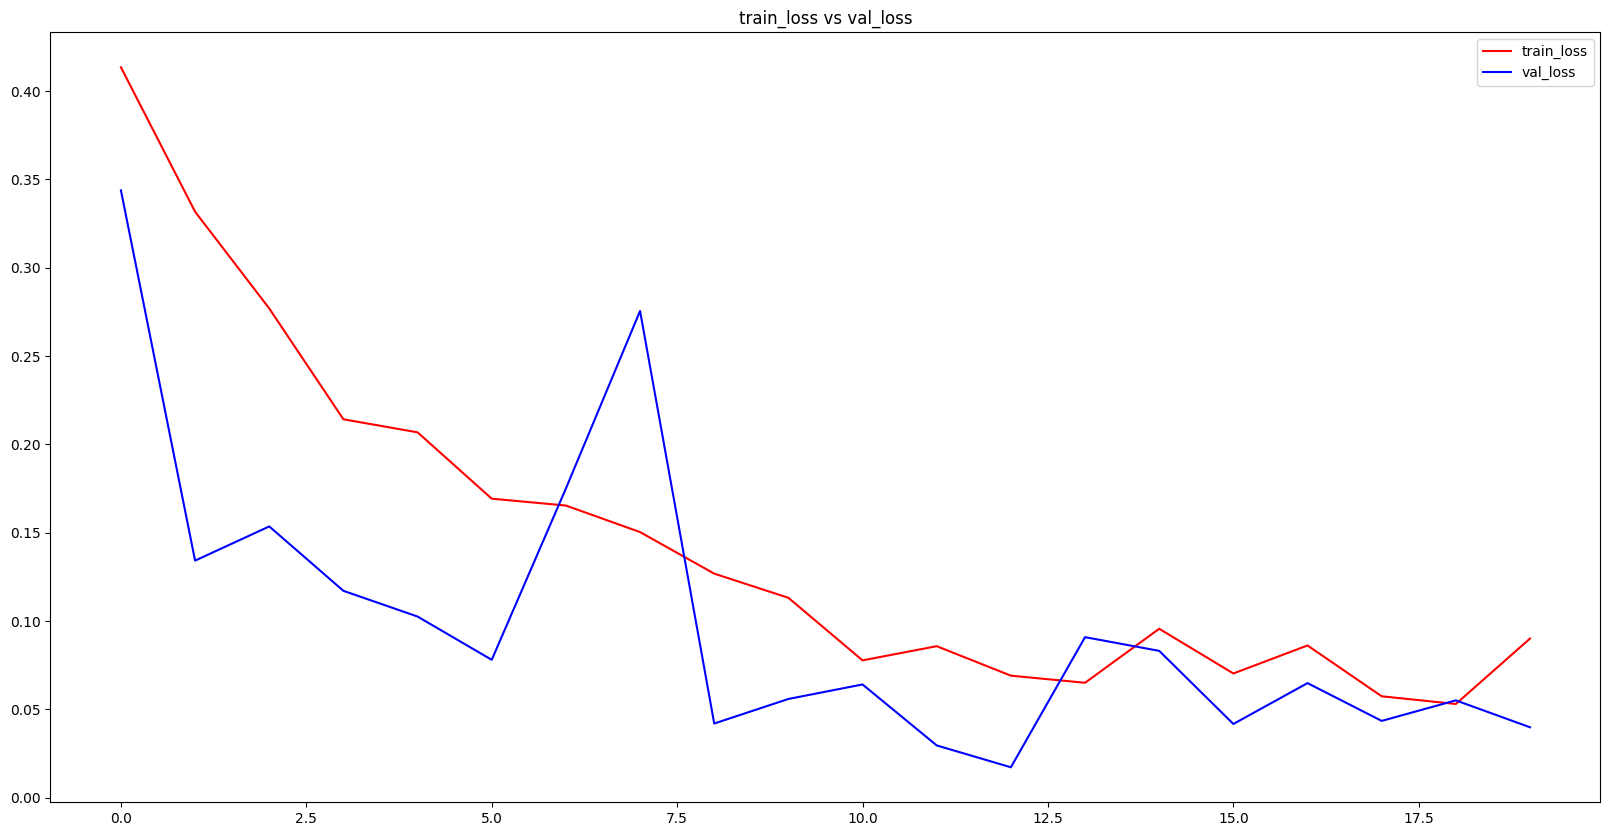

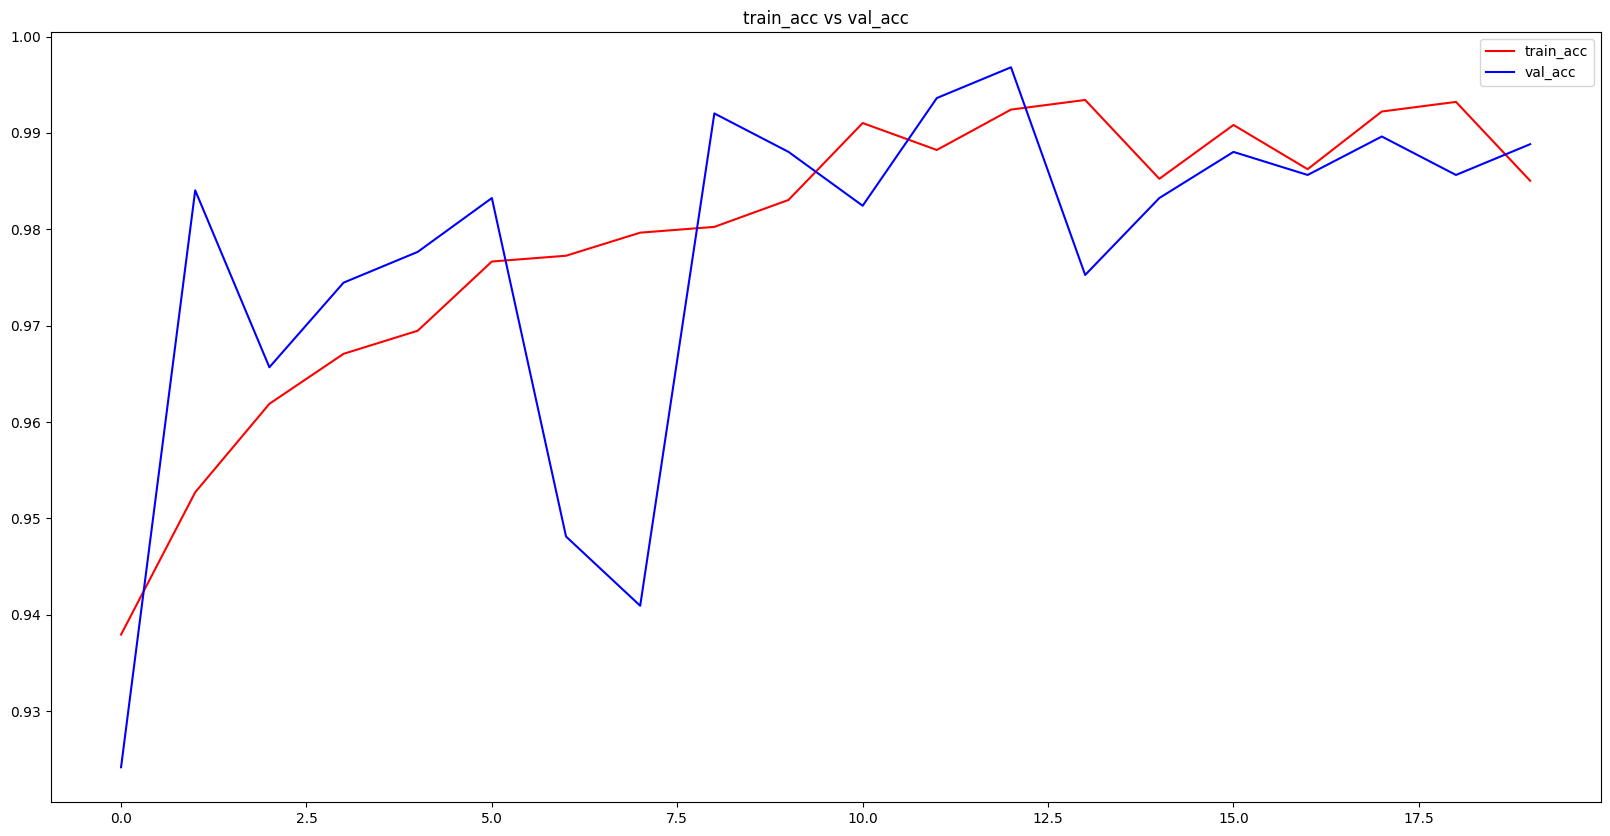

<Figure size 2000x1000 with 0 Axes>

In [17]:

# visualizing losses and accuracy
%matplotlib inline

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

Test Loss: 0.01725512184202671
Test accuracy: 0.9968076348304749
5/5 [==============================] - 1s 90ms/step


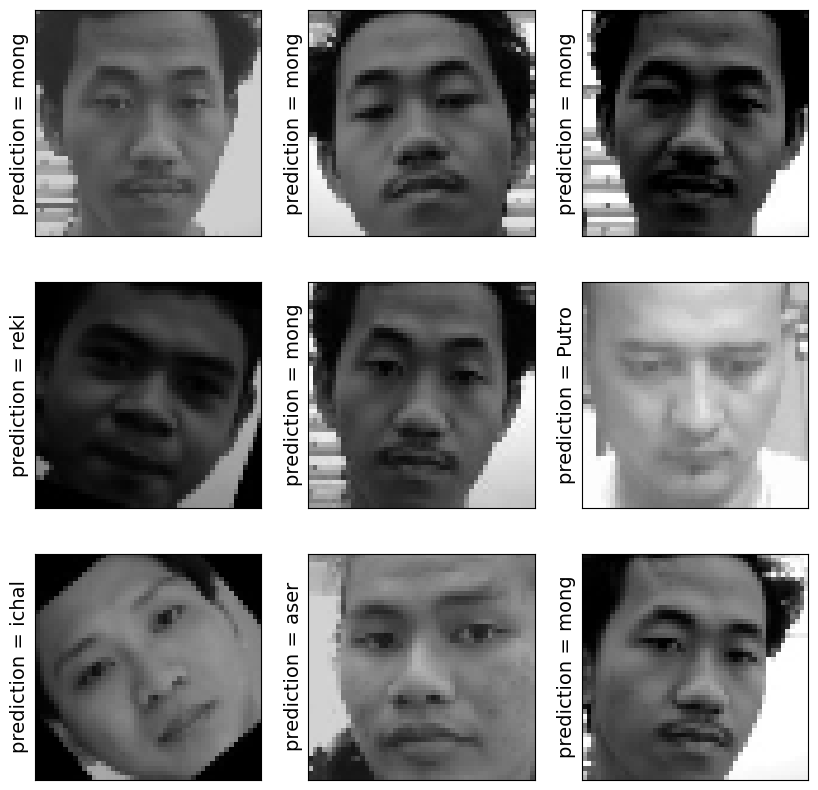

In [18]:
from keras.models import load_model
import tensorflow as tf

model_path = "/content/"+name_file + "_best.hdf5"
model = load_model(model_path, compile=False)
#model.summary()

model.compile(loss=categorical_crossentropy,
             optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])


score = model.evaluate(X_val, y_val, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])



res = model.predict(X_val[0:148]).argmax(axis=-1)
#res = model.predict_classes(X_test[0:18])
plt.figure(figsize=(10, 10))

for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(cv2.cvtColor(X_val[i], cv2.COLOR_BGR2RGB))
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel('prediction = %s' % getLabel(res[i]), fontsize=14)
# show the plot
plt.show()

40/40 [==============================] - 0s 7ms/step
Normalized confusion matrix


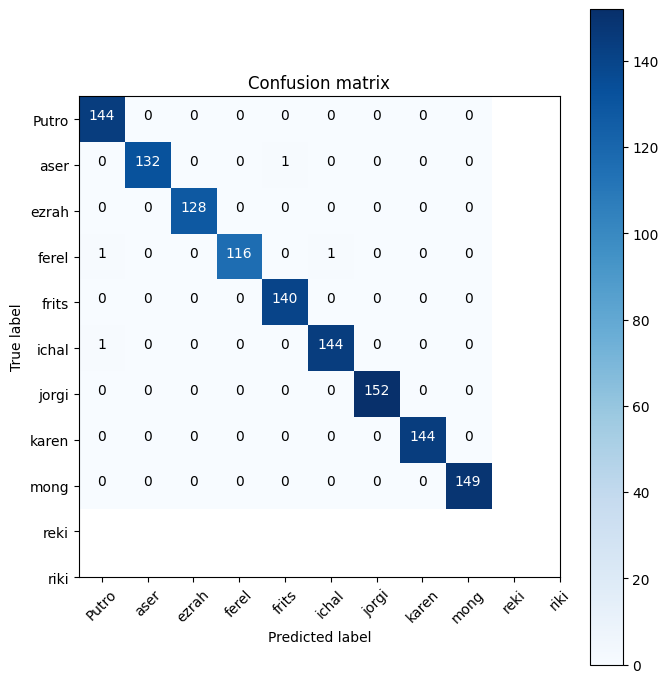

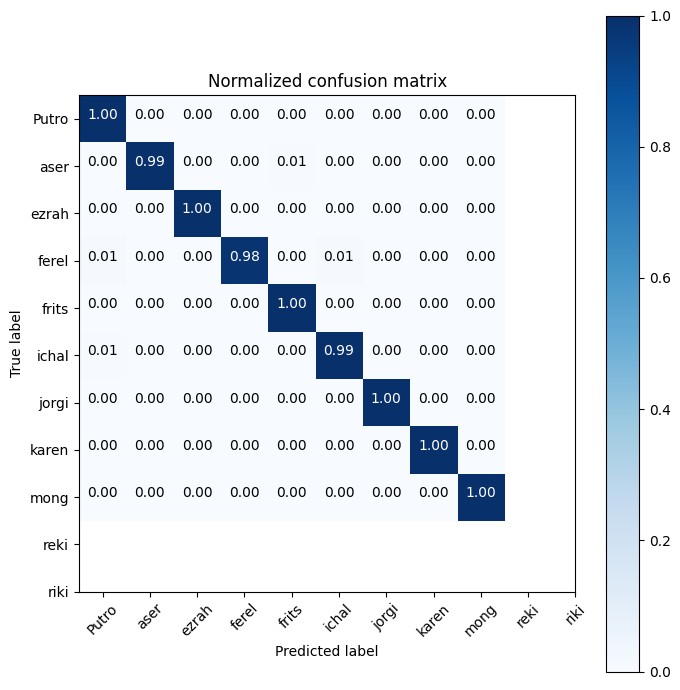

In [20]:
from sklearn.metrics import confusion_matrix
import itertools
rcParams['figure.figsize'] = 7, 7
#results = model.predict_classes(X_test)
y_prob = model.predict(X_val)
results = y_prob.argmax(axis=-1)

cm = confusion_matrix(np.where(y_val == 1)[1], results)
labels = cls

title='Confusion matrix'
#print(cm)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()


plt.figure()
plot_confusion_matrix(cm, classes=labels, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
save_name_file = "/content/"+name_file+".hdf5"
save_name_file = str(save_name_file)
print(save_name_file)
!cp -r -v "/content/RESNET18-48_best.hdf5" "/content/drive/My Drive/"
!cp -r -v "/content/RESNET18-48_LAST.hdf5" "/content/drive/My Drive/"